In [95]:
import pandas as pd
import numpy as np
from faker import Faker

In [96]:
#alunos de uma escola 
faker = Faker('pt_BR')

nomes = []
cpfs = []
idades = []
sexos = []
emails = []
notas = []
CRAs_2semestre = np.full(1000, np.nan)
CRAs_4semestre = np.full(1000, np.nan)
CRAs_6semestre = np.full(1000, np.nan)
Abandono = []
semestre = []

for i in range(1000):
    sexo = faker.boolean()
    if sexo == False:
        nome = faker.name_male()
    else:
        nome = faker.name_female()
    if sexo == False:
        sexo = 'Masculino'
    else: 
        sexo = 'Feminino'
    sexos.append(sexo) 
    nomes.append(nome) 
    cpf = faker.cpf()
    cpfs.append(cpf)  
    idade = np.random.randint(18, 29)
    idades.append(idade)
    email = faker.email()
    emails.append(email)
    enem = np.random.randint(640, 801)
    notas.append(enem)
    abandono = faker.boolean()
    Abandono.append(abandono)
    if abandono:
        semestreAbandono = np.random.randint(1,8)
        if semestreAbandono > 2:
            CRAs_2semestre[i] = np.random.uniform(5, 10)
        elif semestreAbandono > 4: 
            CRAs_4semestre[i] = np.random.uniform(5, 10)
        elif semestreAbandono > 6: 
            CRAs_6semestre[i] = np.random.uniform(5, 10)
    else:
        semestreAbandono = 8
        CRAs_2semestre[i] = np.random.uniform(5, 10)
        CRAs_4semestre[i] = np.random.uniform(5, 10)
        CRAs_6semestre[i] = np.random.uniform(5, 10)
    semestre.append(semestreAbandono)


dados = {
    "Nome" : nomes,
    "Sexo" : sexos,
    "CPF" : cpfs, 
    "Idade" : idades,
    "Email" : emails,
    "Nota Enem": notas,
    "CRAs_2semestre" : CRAs_2semestre,
    "CRAs_4semestre" : CRAs_4semestre,
    "CRAs_6semestre" : CRAs_6semestre,
}



df = pd.DataFrame(dados)
df
df.to_csv("Alunos_Da_Uesc.csv")

    

Sexo
Feminino     524
Masculino    476
Name: count, dtype: int64

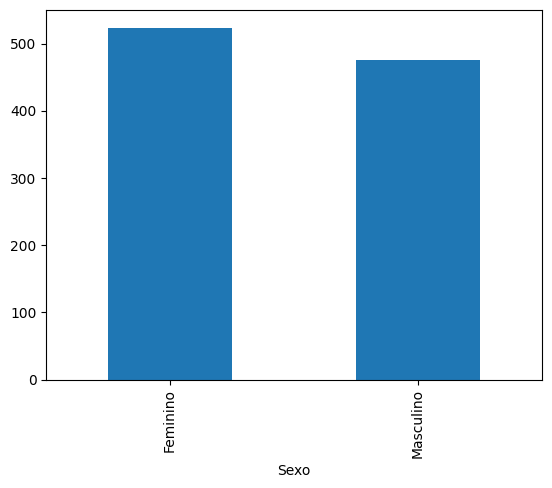

In [97]:
import math
import matplotlib.pyplot as plt

df = pd.read_csv("df/Alunos_Da_Uesc.csv")

sexFM = df["Sexo"].value_counts()

sexFM.plot(kind= "bar")
sexFM


Idade
18    716.655172
19    724.358696
20    714.519608
21    717.144330
22    720.538462
23    716.125000
24    718.210000
25    722.202128
26    719.903226
27    718.433333
28    712.518987
Name: Nota Enem, dtype: float64

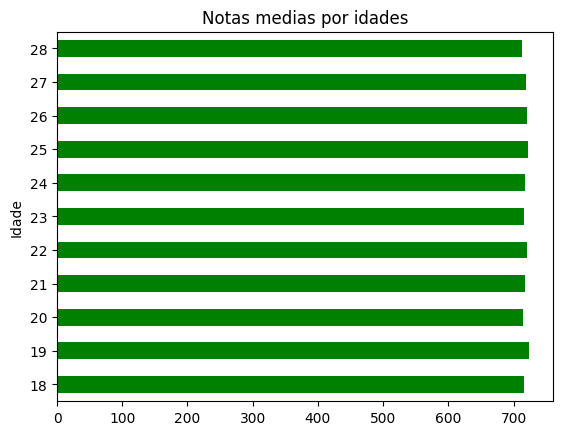

In [98]:
notasIdades = df.groupby("Idade")["Nota Enem"].mean()

notasIdades.plot(kind="barh", title="Notas medias por idades",color= 'green')
notasIdades

In [99]:
def notasNormalizadas(notas):
    limSup = 10
    limInf = 5 
    min = notas.min()
    max = notas.max()

    normalizada = limInf+((notas - min)/(max-min))* (limSup - limInf)
    return normalizada
    
NotaNormalizada = notasNormalizadas(df['Nota Enem'])
NotaNormalizada
df['Nota enem normalizada'] = NotaNormalizada
df


,Unnamed: 0,Nome,Sexo,CPF,Idade,Email,Nota Enem,CRAs_2semestre,CRAs_4semestre,CRAs_6semestre,Nota enem normalizada
0,0,Diego Monteiro,Masculino,136.298.450-70,18,plopes@example.com,731,6.669287,7.109721,8.144300,7.84375
1,1,Ana Lima,Feminino,456.932.871-73,27,pedro-henrique27@example.org,746,6.067574,NaN,NaN,8.31250
2,2,Agatha Azevedo,Feminino,709.851.623-68,26,lucasda-paz@example.net,679,5.745706,8.731804,9.179755,6.21875
3,3,Ana Luiza Vieira,Feminino,736.108.924-04,28,maysa23@example.org,772,5.068869,NaN,NaN,9.12500
4,4,Ana Vitória Fogaça,Feminino,804.532.617-44,23,fernanda46@example.org,683,7.401938,7.525134,7.107340,6.34375
...,...,...,...,...,...,...,...,...,...,...,...
995,995,Enzo Gabriel Rodrigues,Masculino,291.678.534-55,27,emanuel39@example.com,729,8.940699,NaN,NaN,7.78125
996,996,Maysa Azevedo,Feminino,427.813.056-26,27,maria03@example.net,791,7.249658,NaN,NaN,9.71875
997,997,Srta. Nicole Moraes,Feminino,810.594.276-30,18,salves@example.net,665,9.998638,NaN,NaN,5.78125
998,998,Bernardo da Paz,Masculino,156.890.427-49,22,kcaldeira@example.net,679,6.748442,NaN,NaN,6.21875


In [100]:
maiorCRA = df.nlargest(10,"CRAs_6semestre")
maiorCRA
posicao = df["Unnamed: 0"].values
index = pd.DatetimeIndex(posicao, name="Posicao")

df


,Unnamed: 0,Nome,Sexo,CPF,Idade,Email,Nota Enem,CRAs_2semestre,CRAs_4semestre,CRAs_6semestre,Nota enem normalizada
0,0,Diego Monteiro,Masculino,136.298.450-70,18,plopes@example.com,731,6.669287,7.109721,8.144300,7.84375
1,1,Ana Lima,Feminino,456.932.871-73,27,pedro-henrique27@example.org,746,6.067574,NaN,NaN,8.31250
2,2,Agatha Azevedo,Feminino,709.851.623-68,26,lucasda-paz@example.net,679,5.745706,8.731804,9.179755,6.21875
3,3,Ana Luiza Vieira,Feminino,736.108.924-04,28,maysa23@example.org,772,5.068869,NaN,NaN,9.12500
4,4,Ana Vitória Fogaça,Feminino,804.532.617-44,23,fernanda46@example.org,683,7.401938,7.525134,7.107340,6.34375
...,...,...,...,...,...,...,...,...,...,...,...
995,995,Enzo Gabriel Rodrigues,Masculino,291.678.534-55,27,emanuel39@example.com,729,8.940699,NaN,NaN,7.78125
996,996,Maysa Azevedo,Feminino,427.813.056-26,27,maria03@example.net,791,7.249658,NaN,NaN,9.71875
997,997,Srta. Nicole Moraes,Feminino,810.594.276-30,18,salves@example.net,665,9.998638,NaN,NaN,5.78125
998,998,Bernardo da Paz,Masculino,156.890.427-49,22,kcaldeira@example.net,679,6.748442,NaN,NaN,6.21875


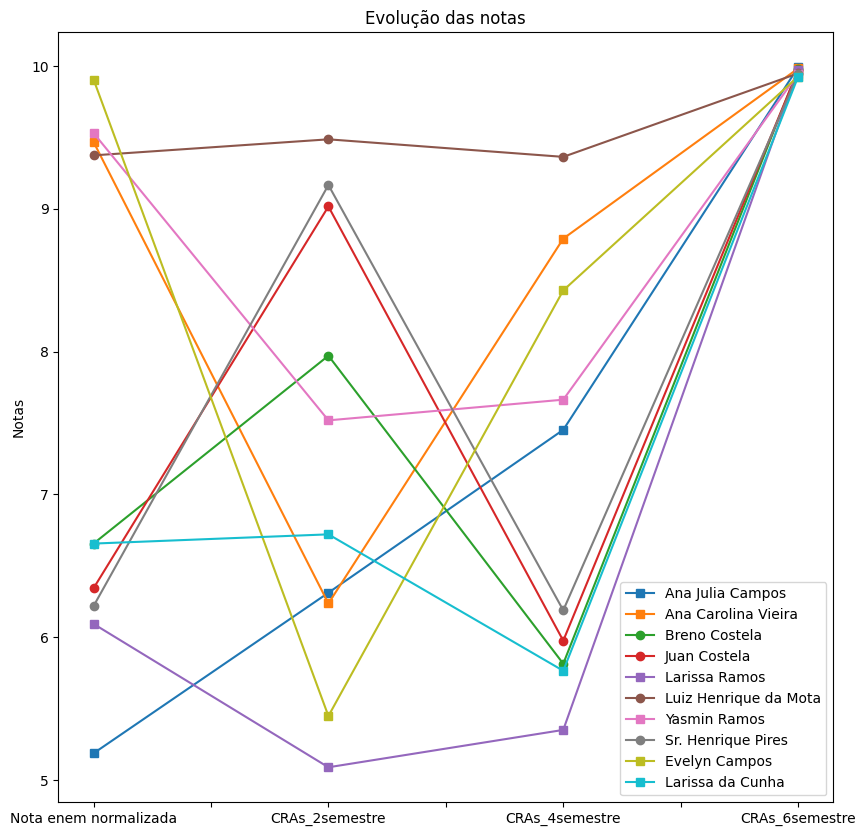

In [102]:
for aluno in maiorCRA.index:
    maiorCRA.loc[aluno,[
        "Nota enem normalizada",
        "CRAs_2semestre",
        "CRAs_4semestre",
        "CRAs_6semestre"]].plot(
            figsize=(10,10),
            title="Evolução das notas",
            ylabel="Notas",
            marker="s" if maiorCRA.loc[aluno,"Sexo"] == "Feminino" else "o");


plt.legend(maiorCRA["Nome"]);
